# Predicting Bike Rentals

In this project, we'll be using data from [lUniversity of California, Irvine's website](http://archive.ics.uci.edu/ml/datasets/Bike+Sharing+Dataset)  representing the number of bike rentals for a single hour of a single day to predict the total number of bikes people rented in a given hour.
The dataset consists of the following columns:

- instant - A unique sequential ID number for each row
- dteday - The date of the rentals
- season - The season in which the rentals occurred
- yr - The year the rentals occurred
- mnth - The month the rentals occurred
- hr - The hour the rentals occurred
- holiday - Whether or not the day was a holiday
- weekday - The day of the week (as a number, 0 to 7)
- workingday - Whether or not the day was a working day
- weathersit - The weather (as a categorical variable)
- temp - The temperature, on a 0-1 scale
- atemp - The adjusted temperature
- hum - The humidity, on a 0-1 scale
- windspeed - The wind speed, on a 0-1 scale
- casual - The number of casual riders (people who hadn't previously signed up with the bike sharing program)
- registered - The number of registered riders (people who had already signed up)
- cnt - The total number of bike rentals (casual + registered)



In [0]:
import pandas as pd

In [2]:
bikes = pd.read_csv('https://raw.githubusercontent.com/sharontan/machine-learning/master/BikeRentals/hour.csv')
bikes.shape

(17379, 17)

In [3]:
bikes.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,2011-01-01,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,2011-01-01,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,2011-01-01,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,2011-01-01,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,2011-01-01,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


In [0]:
import matplotlib.pyplot as plt
%matplotlib inline

(array([6972., 3705., 2659., 1660.,  987.,  663.,  369.,  188.,  139.,
          37.]),
 array([  1. ,  98.6, 196.2, 293.8, 391.4, 489. , 586.6, 684.2, 781.8,
        879.4, 977. ]),
 <a list of 10 Patch objects>)

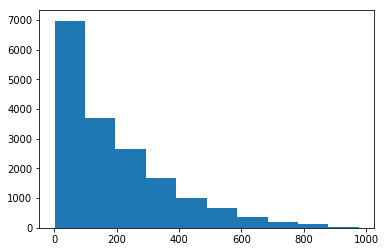

In [5]:
plt.hist(bikes['cnt'])

In [6]:
bikes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
instant       17379 non-null int64
dteday        17379 non-null object
season        17379 non-null int64
yr            17379 non-null int64
mnth          17379 non-null int64
hr            17379 non-null int64
holiday       17379 non-null int64
weekday       17379 non-null int64
workingday    17379 non-null int64
weathersit    17379 non-null int64
temp          17379 non-null float64
atemp         17379 non-null float64
hum           17379 non-null float64
windspeed     17379 non-null float64
casual        17379 non-null int64
registered    17379 non-null int64
cnt           17379 non-null int64
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


This dataset contains one string column and does not contain any null values. The string column relates to the date of rentals. We can easily change the datatype to datetime should we decide to include this in our analysis.

In [7]:
#Correlations of numeric columns to the bike count column
correlations = bikes.corr()['cnt']
correlations.sort_values(ascending=False)[1:]

registered    0.972151
casual        0.694564
temp          0.404772
atemp         0.400929
hr            0.394071
instant       0.278379
yr            0.250495
season        0.178056
mnth          0.120638
windspeed     0.093234
workingday    0.030284
weekday       0.026900
holiday      -0.030927
weathersit   -0.142426
hum          -0.322911
Name: cnt, dtype: float64

Rather than using 24 different unique values in the **hr** column, we can organize this column into more meaningful groups like morning, afternoon, evening and night. 

In [0]:
def assign_label(hour):
  if 6 <= hour < 12:
    return 1
  elif 12 <= hour < 18:
    return 2
  elif 18 <= hour < 24:
    return 3
  elif 0 <= hour < 6:
    return 4  

In [9]:
bikes['time_label'] = bikes['hr'].apply(assign_label)
bikes['time_label'].value_counts()

2    4375
3    4368
1    4360
4    4276
Name: time_label, dtype: int64

### Split dataset into training and test sets

We will be using 80% of the dataset for training, and the remaining for testing.

In [10]:
train = bikes.sample(frac=0.8)
subset = bikes.index.isin(train.index)
train.shape

(13903, 18)

In [11]:
test = bikes.loc[~subset]
test.shape

(3476, 18)

### Columns not considered for training

- **casual**
- **registered**

The above columns are derived from the target column, **cnt**. Therefore, they should not be used for training.

- **dteday**

This columns represents dates of rental. Since there are other columns that provide more meaning to our analysis.

- **instant**

This column represents identifiers for each row which bears no relevance to our projections.





In [0]:
cols = ['season', 'yr', 'hr', 'temp', 'atemp', 'windspeed', 'workingday', 'weekday', 'holiday', 'weathersit', 'hum', 'time_label']
target = 'cnt'

## Linear Regression

In [0]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

In [0]:
lr = LinearRegression()
lr.fit(train[cols], train[target])
predictions = lr.predict(test[cols])

In [15]:
mse = mean_squared_error(test[target], predictions)
rmse = mse ** 0.5
rmse

132.93473651896952

## Decision Trees

In [0]:
from sklearn.tree import DecisionTreeRegressor

In [0]:
tree = DecisionTreeRegressor(min_samples_leaf=5)
tree.fit(train[cols], train[target])
tree_predictions = tree.predict(test[cols])

In [18]:
tree_mse = mean_squared_error(test[target], tree_predictions)
tree_rmse = tree_mse ** 0.5
tree_rmse

52.32628566732628

## Random Forest

In [0]:
from sklearn.ensemble import RandomForestRegressor

In [0]:
forest = RandomForestRegressor(n_estimators=10, min_samples_leaf=5)
forest.fit(train[cols], train[target])
forest_predictions = forest.predict(test[cols])

In [21]:
forest_mse = mean_squared_error(test[target], forest_predictions)
forest_rmse = forest_mse ** 0.5
forest_rmse

45.8120943142745

## Conclusion

The metric error reduced as we moved from using Linear Regression models to Decision Trees. The metric error reduced even further after we used the Random Forest Regressor for our predictions.